In [ ]:
#import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/dmg ass3/covtype_train.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn import metrics
import scipy.stats
import sklearn.metrics
from sklearn.metrics import silhouette_score

# Load the CSV file
df = pd.read_csv("covtype_train.csv")
df.drop_duplicates(keep=False,inplace=True)


df = df.astype({"Elevation":'category','Aspect':'category','Slope':'category','Hillshade_9am':'category','Hillshade_Noon':'category','Horizontal_Distance_To_Fire_Points':'category'})
for c in df.columns:
    df[c] = df[c].astype('category').cat.codes
print(df.shape)
newdf=df





(2239, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


[[ 0.67270553  0.02118135  0.0079722 ]
 [-0.11802226 -0.28254283 -0.22540067]
 [-0.07455899 -0.31758274  0.40379012]
 [-0.23422288  0.74380196 -0.07678057]
 [-0.45684404  0.07887002 -0.14537701]
 [-0.04815445  0.12155484 -0.48857639]
 [-0.12168506  0.35856902  0.57533475]]


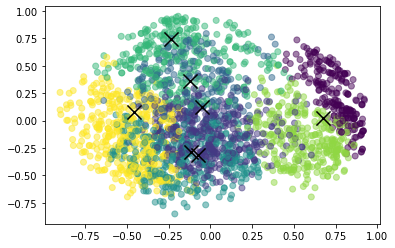

In [ ]:
df.drop_duplicates(keep=False,inplace=True)

features=['Elevation', 'Aspect', 'Slope', 'Hillshade_9am','Hillshade_Noon',
      'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points', 'Soil_Type','Wilderness']

#scaling && normalising      
X=df[features]
z=StandardScaler()
X[features]=z.fit_transform(X)
normalized_df = normalize(X[features]) 
normalized_df = pd.DataFrame(normalized_df) 

pca = PCA(n_components = 3) 
X_trans = pca.fit_transform(normalized_df) 
X_trans = pd.DataFrame(X_trans ) 
X_trans.columns = ['P1', 'P2','P3'] 
  
#Applying Gaussian Mixture
GM=GaussianMixture(n_components=7)
GM.fit(X_trans)
cluster=GM.predict(X_trans)
cluster
X['cluster']=cluster



#plotting
plt.scatter(X_trans['P1'], X_trans['P2'],  
           c = GaussianMixture(n_components = 7).fit_predict(X_trans),  alpha = 0.5) 
x,y=X_trans['P1'],X_trans['P2']
X_trans['cluster']=cluster

X_trans.groupby('cluster').nunique()
centroid=[]
for i in X_trans.cluster.unique():
  l1=[]
  l1=X_trans[X_trans.cluster == i ]
  c1=l1['P1'].sum()/len(l1)
  c2=l1['P2'].sum()/len(l1)
  c3=l1['P3'].sum()/len(l1)
  centroid.append([c1,c2,c3])
centroid = np.array(centroid)

print(centroid)                  
plt.scatter(centroid[:,0],centroid[:,1], c="black", s=200, marker=('x'))
plt.show()


Comparison of true labels with cluster distributions Q1(3Part)

In [ ]:
#Giving clusters labels according to the majority data points belonging there
cluster_labels = []
for i in range(GM.n_components):
  dist = np.unique(df['target'][cluster==i], return_counts=True)
  #print(dist)
  cluster_labels.append(dist[0][np.argmax(dist[1])])
cluster_labels

[0, 2, 0, 0, 1, 1, 1]

In [ ]:
#Giving predicted clusters labels according to the cluster they belong
predict_labels_data = np.array([cluster_labels[i] for i in cluster])
predict_labels_data

array([2, 2, 1, ..., 0, 2, 1], dtype=int8)

In [ ]:
sklearn.metrics.accuracy_score(df['target'], predict_labels_data)

0.4135774899508709